In [1]:
#00. 패키지 호출
import pandas as pd 
import numpy as np 
import warnings 
import datetime
import matplotlib as mpl
import matplotlib.pylab as plt
from sklearn.linear_model import ElasticNet # 엘라스틱넷
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error,accuracy_score

#00-1. warning message ignore 
warnings.filterwarnings(action='ignore')

#00-2. 난수씨드값 지정하기.
np.random.seed(2021)

#00-3. 시각화 옵션 설정하기. 
%matplotlib inline

In [2]:
# load data
df_감자 = pd.read_csv("C:/ken/elasticnet/감자.csv")
df_감자.head()

,date,PC1,PC2,����
0,2018-01-01T00:00:00Z,-3.719474,0.965108,155.474491
1,2018-01-02T00:00:00Z,-3.741912,0.888377,187.012187
2,2018-01-03T00:00:00Z,-4.074829,0.748572,198.857517
3,2018-01-04T00:00:00Z,-4.325838,0.235772,201.311370
4,2018-01-05T00:00:00Z,-3.772842,0.246325,192.594032


In [3]:
# 원본 보관하기.  
df_감자_raw = df_감자

# 날짜 컬럼 인덱스로 지정하기. 
df_감자 = df_감자.set_index('date')

# train, test 데이터셋을 연속적으로 분할하기. 
X_train = df_감자.iloc[0:365,:-1]
y_train = df_감자.iloc[0:365,-1]
X_test  = df_감자.iloc[365:730,:-1]
y_test  = df_감자.iloc[365:730,-1]

# 데이터셋 차원 확인하기.
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((365, 2), (365,), (365, 2), (365,))

In [4]:
# 모형 생성
model_elastic = ElasticNet()
model_elastic.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [5]:
# GridSearch를 위한 하이퍼파라미터 값 지정하기
params = {
    'alpha' : [0.0001,0.01,1,2,3,4],
    'l1_ratio' : [0.3, 0.5, 0.7]
}

# GridsearchCV() 메서드를 이용해 훈련 모델 할당하기. 
gscv_model_elastic = GridSearchCV(model_elastic, param_grid=params, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# 모형 학습하기. 
gscv_model_elastic.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.01, 1, 2, 3, 4],
                         'l1_ratio': [0.3, 0.5, 0.7]},
             scoring='neg_mean_squared_error')

In [6]:
# 최적 하이퍼 파라미터 확인하기. 
gscv_model_elastic.best_params_

{'alpha': 1, 'l1_ratio': 0.3}

In [7]:
np.abs(gscv_model_elastic.best_score_)

1242.9637373405192

In [8]:
# test 데이터셋으로 모형 예측 및 평가하기. 
#① R-squared
gscv_model_elastic_fit = gscv_model_elastic.best_estimator_
gscv_model_elastic_pred = gscv_model_elastic_fit.predict(X_test)
r2_score(y_test,gscv_model_elastic_pred)

0.18078451589667754

In [9]:
#② RMSE 
mse = mean_squared_error(y_test,gscv_model_elastic_pred)
mse

1254.1417088540607

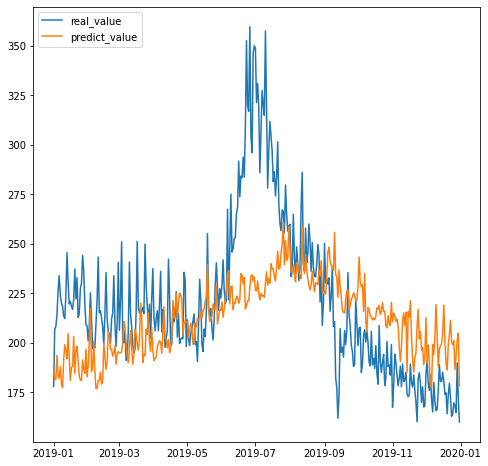

In [10]:
# 예측값 시각화하기. 
test_date = df_감자_raw.iloc[365:730,0]
test_date = test_date.astype('str')
test_date = pd.to_datetime(test_date)
plt.figure(figsize=(8,8))
plt.plot(test_date, y_test, label='real_value')
plt.plot(test_date, gscv_model_elastic_pred, label='predict_value')
plt.legend(loc='upper left')
plt.show()

########## 다항식 적용후 #############

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

modelElastic = make_pipeline(StandardScaler(),ElasticNet())
param_value = {'elasticnet__alpha':[0.0001,0.01,1,2,3,4]}
gridSearch = GridSearchCV(modelElastic,param_grid = param_value,cv=10) # 교차검증, 파라미터 값 찾기
gridSearch.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__alpha': [0.0001, 0.01, 1, 2, 3, 4]})

In [12]:
gridSearch.best_params_

{'elasticnet__alpha': 1}

In [13]:
np.abs(gridSearch.best_score_)

3.0388429225023637

In [14]:
# test 데이터셋으로 모형 예측 및 평가하기. 
#① R-squared
gscv_model_elastic_fit = gridSearch.best_estimator_
gscv_model_elastic_pred = gscv_model_elastic_fit.predict(X_test)
r2_score(y_test,gscv_model_elastic_pred)

0.1572160174290984

In [17]:
#② RMSE 
mse = mean_squared_error(y_test,gscv_model_elastic_pred)
mse

1290.2228590725617

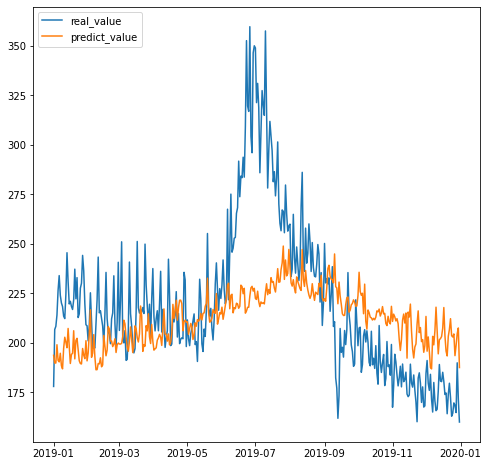

In [18]:
# 예측값 시각화하기. 
test_date = df_감자_raw.iloc[365:730,0]
test_date = test_date.astype('str')
test_date = pd.to_datetime(test_date)
plt.figure(figsize=(8,8))
plt.plot(test_date, y_test, label='real_value')
plt.plot(test_date, gscv_model_elastic_pred, label='predict_value')
plt.legend(loc='upper left')
plt.show()